<a href="https://colab.research.google.com/github/Pavi1903/cat-vs-dog-classification/blob/main/Dog_vs_Cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.ASDDOC_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [ ]:
for i, example in enumerate(dataset['train']):
  image,label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label],i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150,150),
                                              batch_size=128,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150,150),
                                              batch_size=128,
                                              class_mode='binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [ ]:
model = Sequential()
#1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#3rd layer CNN
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


146/146 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.5795 - loss: 3.2734 - val_accuracy: 0.5012 - val_loss: 0.8400
Epoch 2/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.6944 - loss: 0.5947 - val_accuracy: 0.5119 - val_loss: 1.1482
Epoch 3/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.7371 - loss: 0.5270 - val_accuracy: 0.5438 - val_loss: 1.5989
Epoch 4/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.7679 - loss: 0.4787 - val_accuracy: 0.5412 - val_loss: 1.7460
Epoch 5/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.7898 - loss: 0.4526 - val_accuracy: 0.7218 - val_loss: 0.7482
Epoch 6/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.7958 - loss: 0.4456 - val_accuracy: 0.7093 - val_loss: 0.7799
Epoch 7/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.7997 - loss: 0.4259 - val_accuracy: 0.7267 - val_loss: 0.6594
Epoch 8/10
146/146 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8083 - loss: 0.4198 - val_accuracy: 0.778

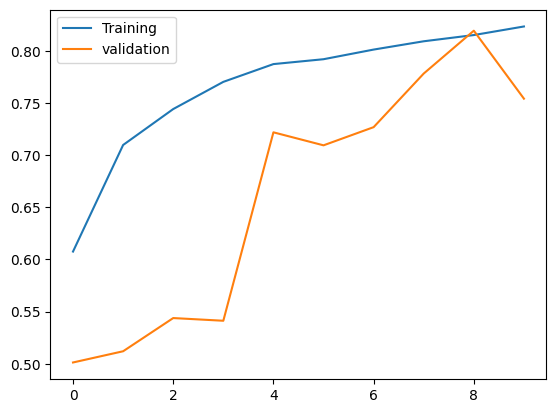

In [ ]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend(['Training', 'validation'])
plt.show()

In [ ]:
model.save('cats_vs_dogs.h5')

In [ ]:
model_load= tf.keras.models.load_model('cats_vs_dogs.h5')

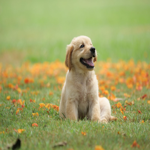

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
[[0.9614415]]


'dog'

In [ ]:
import requests
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.display import display

img_url = "https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150,150))

display(img)

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)
print(prediction)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]